# Import Liberaries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


# Load Data

In [15]:
df = pd.read_csv('heart.csv')

In [16]:
df.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0


In [17]:
df.shape

(918, 12)

In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             918 non-null    int64  
 1   Sex             918 non-null    object 
 2   ChestPainType   918 non-null    object 
 3   RestingBP       918 non-null    int64  
 4   Cholesterol     918 non-null    int64  
 5   FastingBS       918 non-null    int64  
 6   RestingECG      918 non-null    object 
 7   MaxHR           918 non-null    int64  
 8   ExerciseAngina  918 non-null    object 
 9   Oldpeak         918 non-null    float64
 10  ST_Slope        918 non-null    object 
 11  HeartDisease    918 non-null    int64  
dtypes: float64(1), int64(6), object(5)
memory usage: 86.2+ KB


In [19]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Age,918.0,53.510893,9.432617,28.0,47.00,54.0,60.0,77.0
RestingBP,918.0,132.396514,18.514154,0.0,120.00,130.0,140.0,200.0
Cholesterol,918.0,198.799564,109.384145,0.0,173.25,223.0,267.0,603.0
FastingBS,918.0,0.233115,0.423046,0.0,0.00,0.0,0.0,1.0
MaxHR,918.0,136.809368,25.460334,60.0,120.00,138.0,156.0,202.0
Oldpeak,918.0,0.887364,1.066570,-2.6,0.00,0.6,1.5,6.2
HeartDisease,918.0,0.553377,0.497414,0.0,0.00,1.0,1.0,1.0


In [21]:
df.duplicated().sum()

0

In [22]:
for column in df.columns:
    if df[column].dtypes != object and df[column].nunique() <= 10:
        print(f"{column} : {df[column].unique()}")
        print(df[column].value_counts())
        print("====================================")

FastingBS : [0 1]
FastingBS
0    704
1    214
Name: count, dtype: int64
HeartDisease : [0 1]
HeartDisease
1    508
0    410
Name: count, dtype: int64


In [23]:
for column in df.columns:
    if df[column].dtype == object and df[column].nunique() <= 10:
        print(f"{column} : {df[column].unique()}")
        print(df[column].value_counts())
        print("====================================")

Sex : ['M' 'F']
Sex
M    725
F    193
Name: count, dtype: int64
ChestPainType : ['ATA' 'NAP' 'ASY' 'TA']
ChestPainType
ASY    496
NAP    203
ATA    173
TA      46
Name: count, dtype: int64
RestingECG : ['Normal' 'ST' 'LVH']
RestingECG
Normal    552
LVH       188
ST        178
Name: count, dtype: int64
ExerciseAngina : ['N' 'Y']
ExerciseAngina
N    547
Y    371
Name: count, dtype: int64
ST_Slope : ['Up' 'Flat' 'Down']
ST_Slope
Flat    460
Up      395
Down     63
Name: count, dtype: int64


# EDA

In [24]:
numerical_columns = df.select_dtypes(exclude='object').columns
categorical_columns = df.select_dtypes('object').columns

In [25]:
numerical_columns

Index(['Age', 'RestingBP', 'Cholesterol', 'FastingBS', 'MaxHR', 'Oldpeak',
       'HeartDisease'],
      dtype='object')

In [26]:
categorical_columns

Index(['Sex', 'ChestPainType', 'RestingECG', 'ExerciseAngina', 'ST_Slope'], dtype='object')

## Univariant

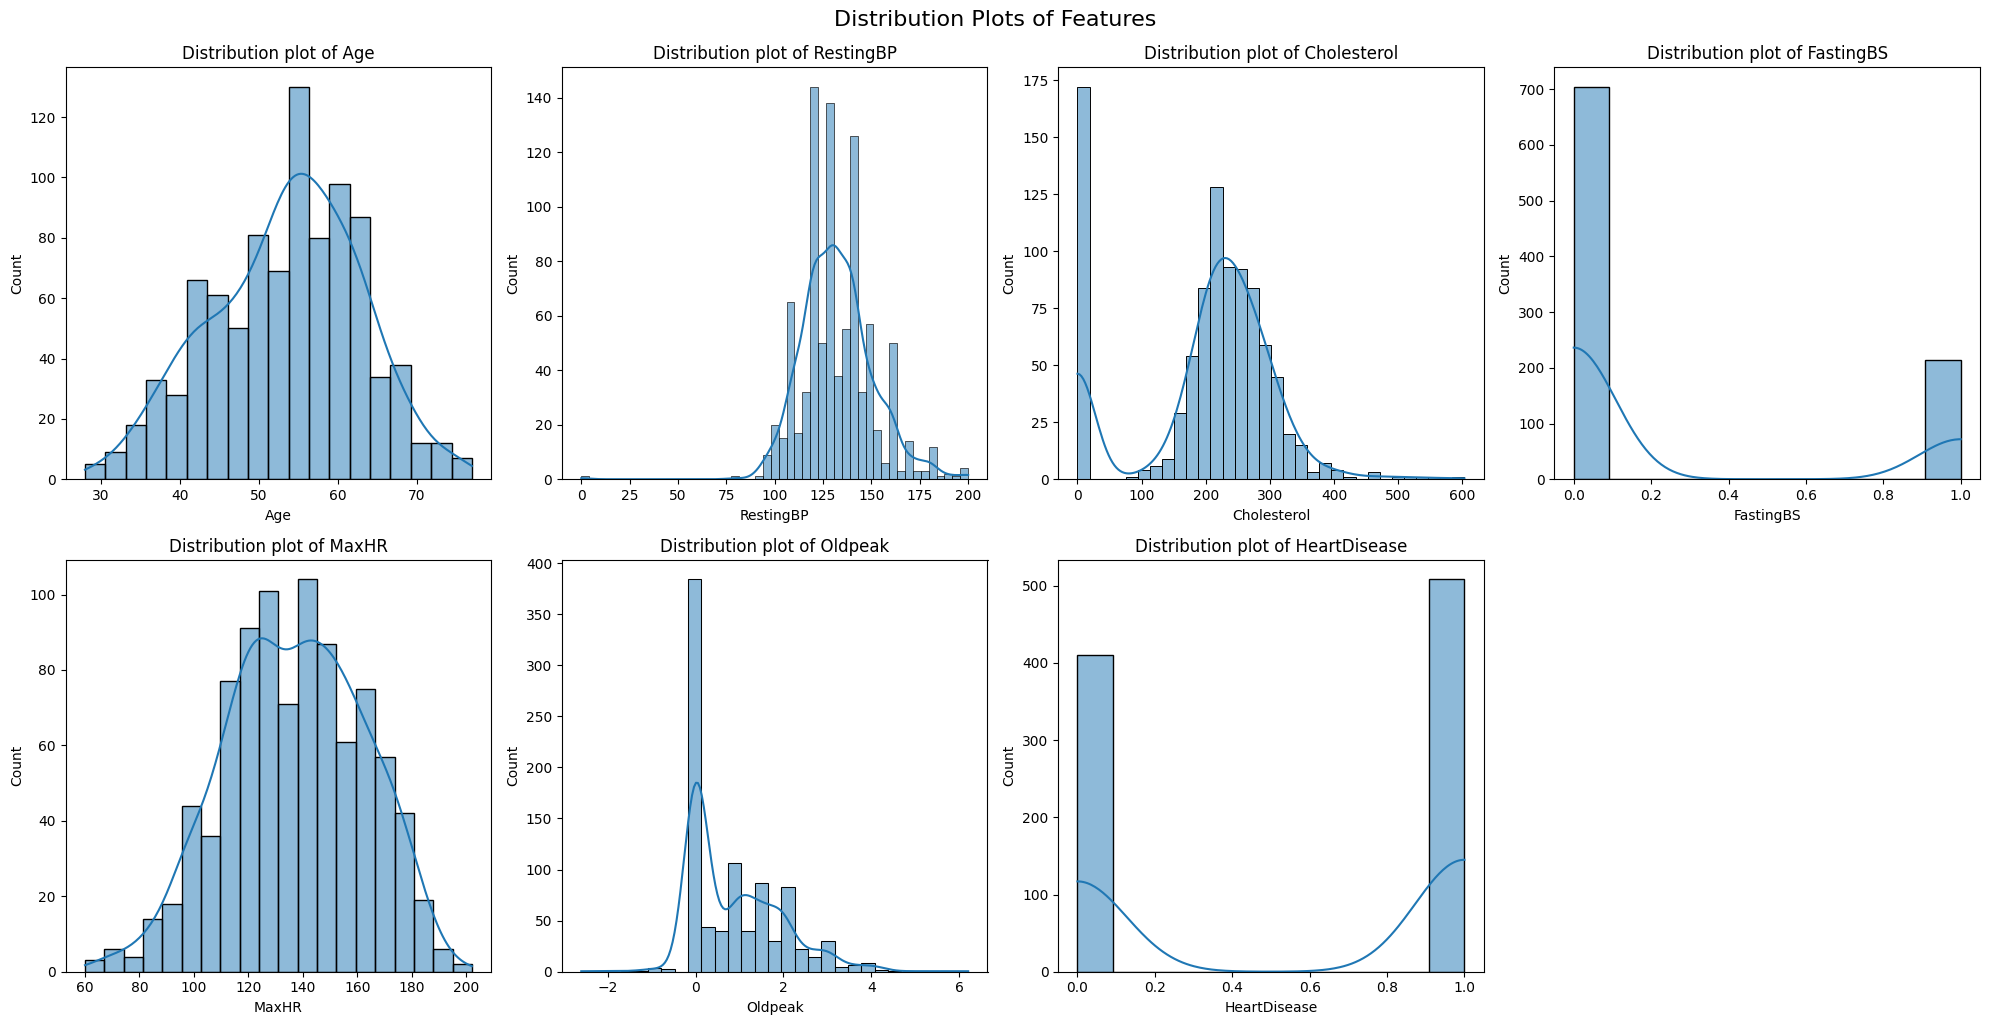

In [27]:
# Calculate the number of rows needed for subplots
n = len(numerical_columns)
rows = int(np.ceil(n/4))

fig, axs = plt.subplots(rows, 4, figsize=(20, 5*rows))

# Flatten the axes array, to make iterating over it easier
axs = axs.flatten()

for i, c in enumerate(numerical_columns):
    sns.histplot(df[c], ax=axs[i], kde=True)
    axs[i].set_title(f'Distribution plot of {c}')

# Remove any unused subplots
if n % 4:
    for j in range(n, rows*4):
        fig.delaxes(axs[j])

plt.tight_layout()
plt.suptitle('Distribution Plots of Features', x=0.5, y=1.02, fontsize=16)
plt.show()

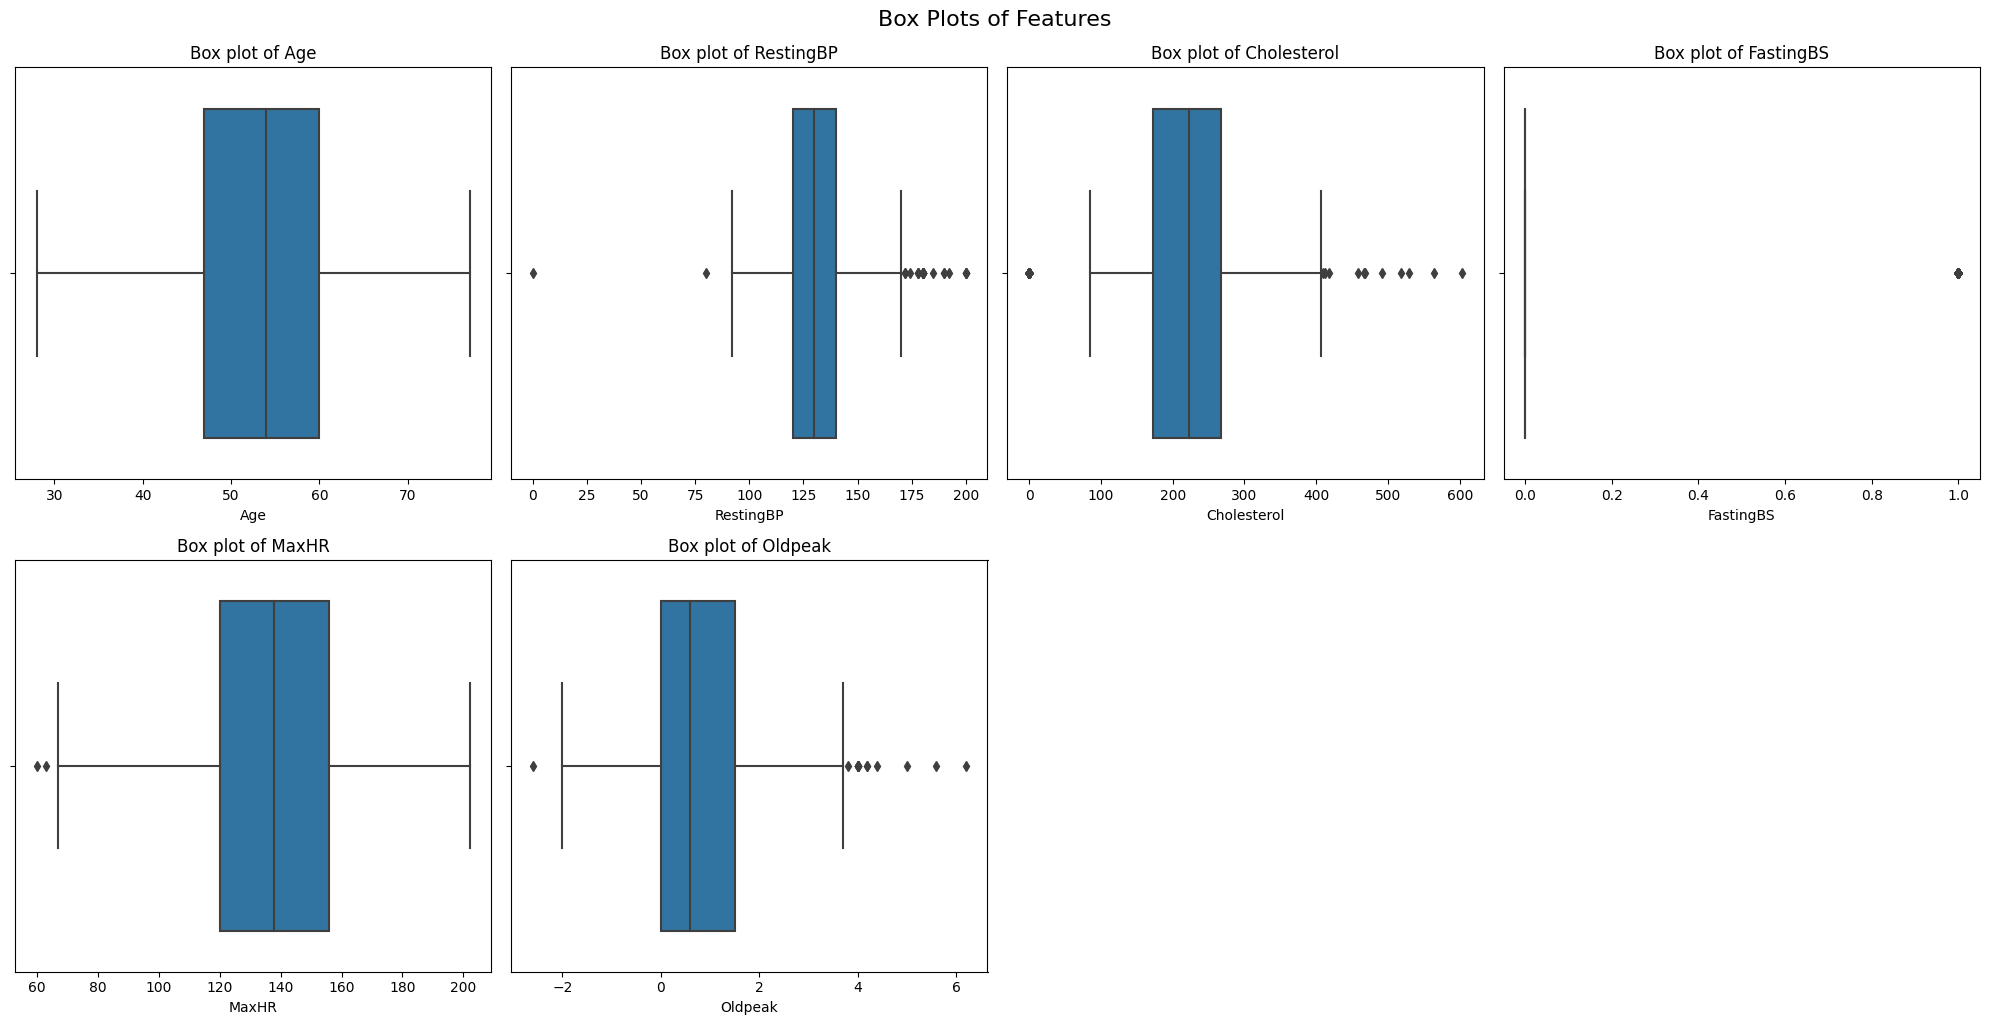

In [15]:
n = len(numerical_columns[:-1])
rows = int(np.ceil(n/4))

fig, axs = plt.subplots(rows, 4, figsize=(20, 5*rows))

# Flatten the axes array, to make iterating over it easier
axs = axs.flatten()

for i, c in enumerate(numerical_columns[:-1]):
    sns.boxplot(x=df[c], ax=axs[i])
    axs[i].set_title(f'Box plot of {c}')

# Remove any unused subplots
if n % 4:
    for j in range(n, rows*4):
        fig.delaxes(axs[j])

plt.tight_layout()
plt.suptitle('Box Plots of Features', x=0.5, y=1.02, fontsize=16)
plt.show()

In [16]:
def detect_outliers_iqr(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    
    # Define bounds
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    
    # Detect outliers
    outliers = df[(df[column] < lower_bound) | (df[column] > upper_bound)][column]
    
    return {
        "Q1": Q1,
        "Q3": Q3,
        "IQR": IQR,
        "Lower Bound": lower_bound,
        "Upper Bound": upper_bound,
        "Outliers": outliers.tolist()
    }
    

In [17]:
for column in numerical_columns:
    print(f'Column Name: {column}')
    print(detect_outliers_iqr(df, column))
    print()

Column Name: Age
{'Q1': 47.0, 'Q3': 60.0, 'IQR': 13.0, 'Lower Bound': 27.5, 'Upper Bound': 79.5, 'Outliers': []}

Column Name: RestingBP
{'Q1': 120.0, 'Q3': 140.0, 'IQR': 20.0, 'Lower Bound': 90.0, 'Upper Bound': 170.0, 'Outliers': [190, 180, 180, 180, 200, 180, 180, 180, 80, 200, 185, 200, 180, 180, 0, 178, 172, 180, 190, 174, 178, 180, 200, 192, 178, 180, 180, 172]}

Column Name: Cholesterol
{'Q1': 173.25, 'Q3': 267.0, 'IQR': 93.75, 'Lower Bound': 32.625, 'Upper Bound': 407.625, 'Outliers': [468, 518, 412, 529, 466, 603, 491, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0

In [18]:
df2 = df

In [19]:
df2 = df2[df2['RestingBP'] > 50]

In [20]:
df2 = df2[df2['Cholesterol'] < 500]

In [21]:
df2 = df2[df2['MaxHR'] > 60 ]

In [22]:
df2 = df2[(df2['Oldpeak'] >= 0) & (df2['Oldpeak'] <= 6)]

In [23]:
df2.shape

(898, 12)

In [24]:
df.shape

(918, 12)

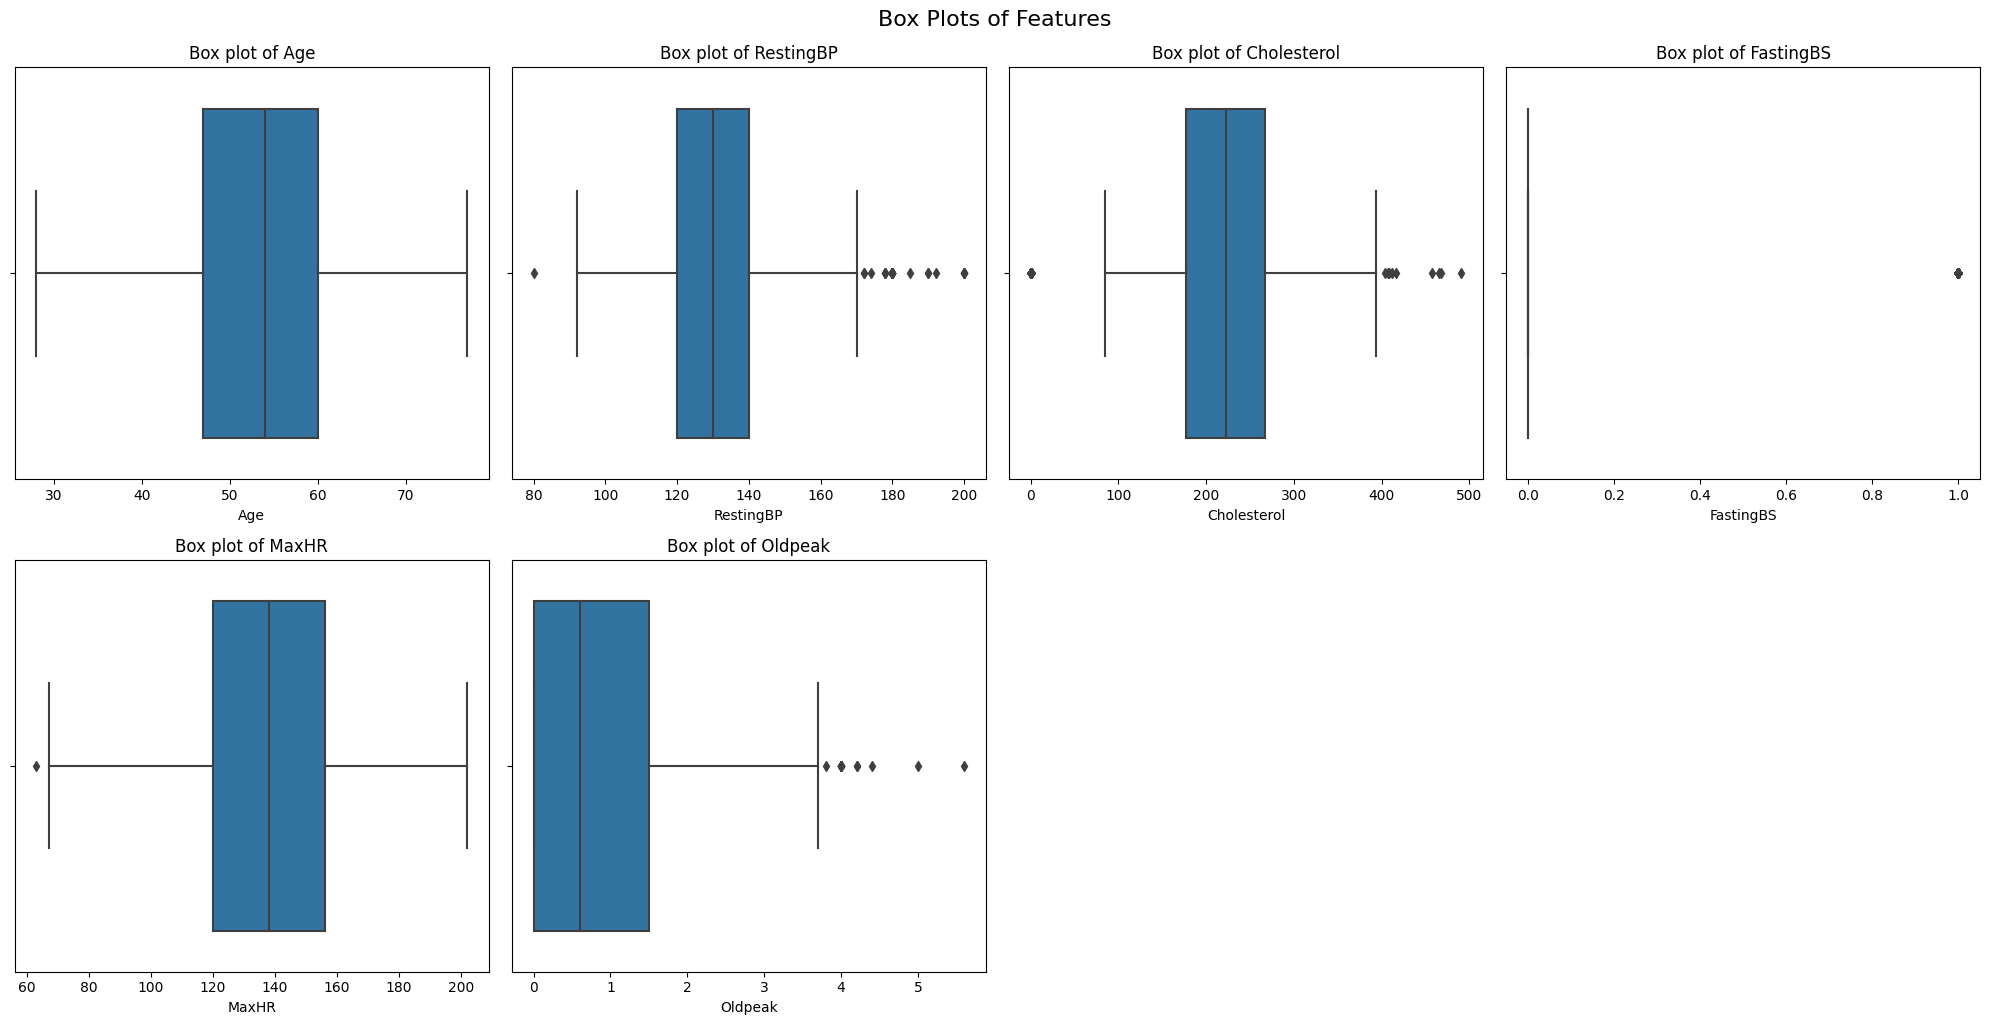

In [25]:
n = len(numerical_columns[:-1])
rows = int(np.ceil(n/4))

fig, axs = plt.subplots(rows, 4, figsize=(20, 5*rows))

# Flatten the axes array, to make iterating over it easier
axs = axs.flatten()

for i, c in enumerate(numerical_columns[:-1]):
    sns.boxplot(x=df2[c], ax=axs[i])
    axs[i].set_title(f'Box plot of {c}')

# Remove any unused subplots
if n % 4:
    for j in range(n, rows*4):
        fig.delaxes(axs[j])

plt.tight_layout()
plt.suptitle('Box Plots of Features', x=0.5, y=1.02, fontsize=16)
plt.show()

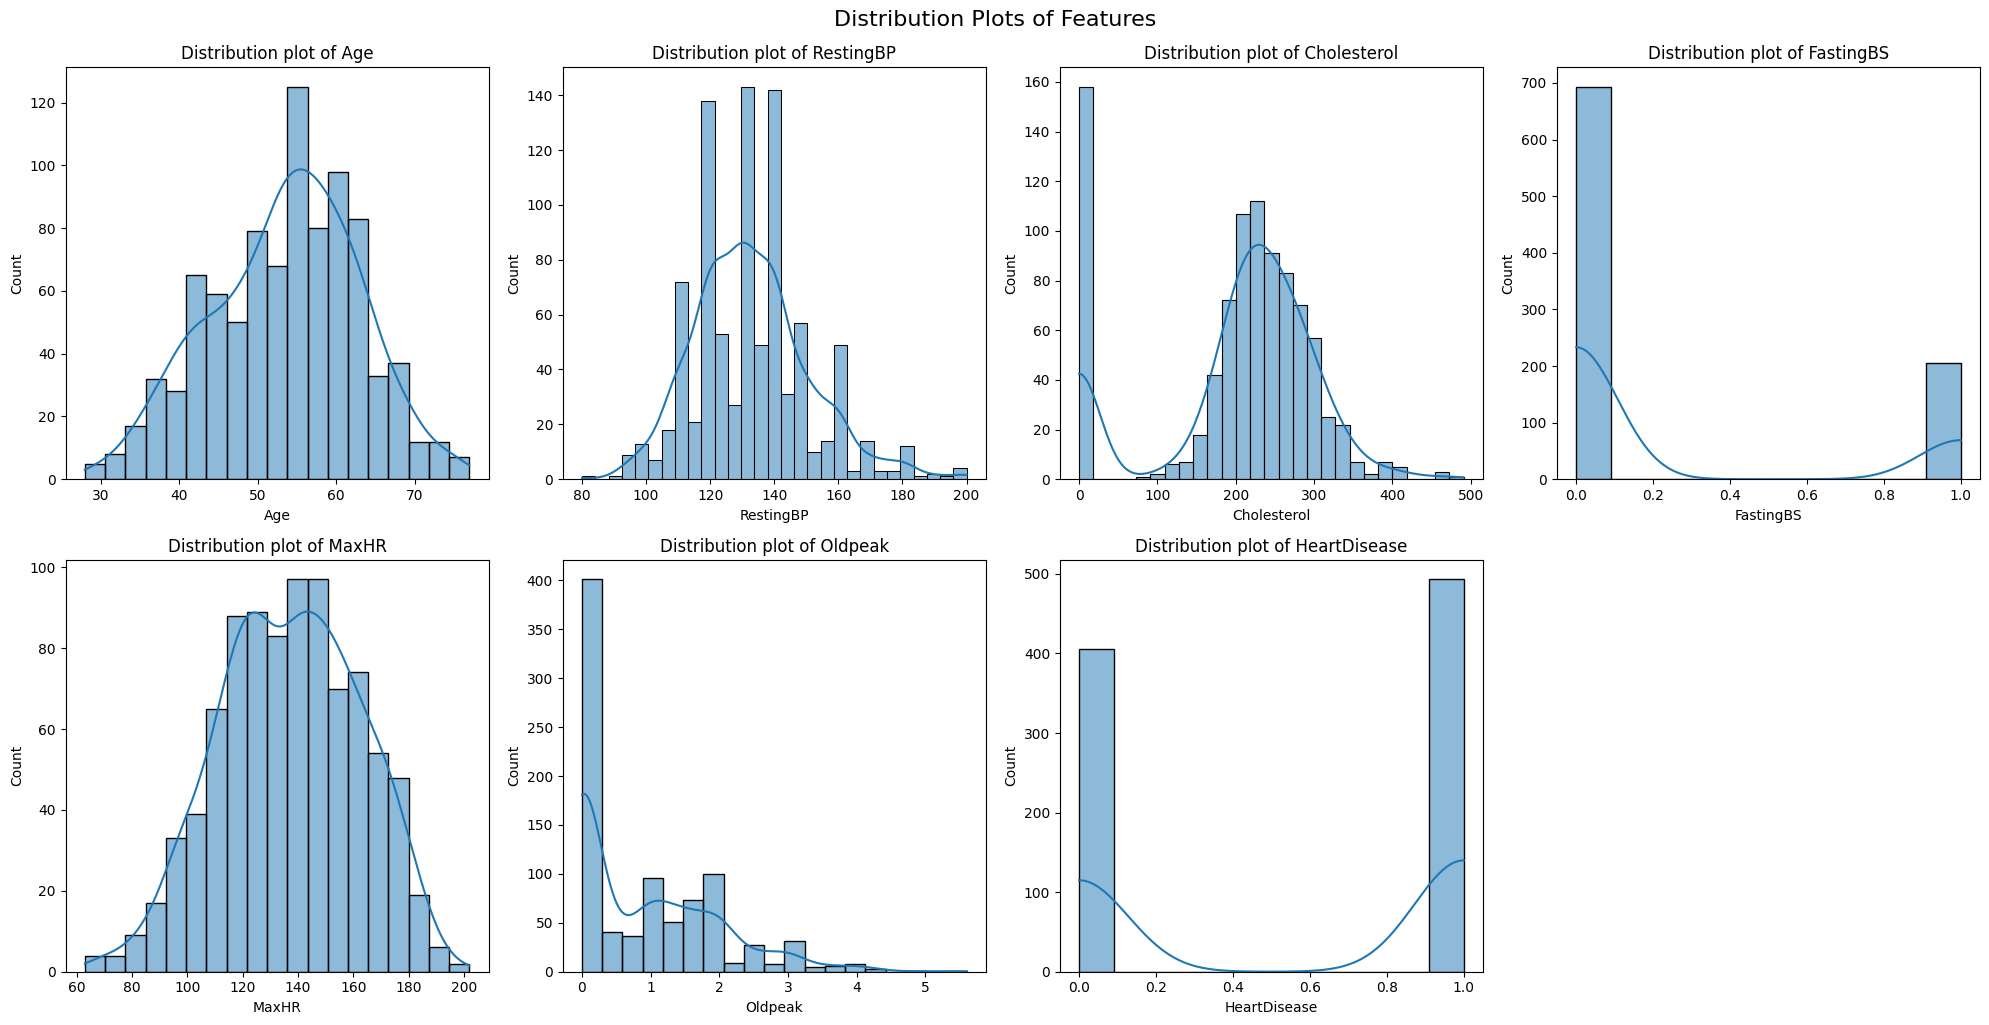

In [26]:
# Calculate the number of rows needed for subplots
n = len(numerical_columns)
rows = int(np.ceil(n/4))

fig, axs = plt.subplots(rows, 4, figsize=(20, 5*rows))

# Flatten the axes array, to make iterating over it easier
axs = axs.flatten()

for i, c in enumerate(numerical_columns):
    sns.histplot(df2[c], ax=axs[i], kde=True)
    axs[i].set_title(f'Distribution plot of {c}')

# Remove any unused subplots
if n % 4:
    for j in range(n, rows*4):
        fig.delaxes(axs[j])

plt.tight_layout()
plt.suptitle('Distribution Plots of Features', x=0.5, y=1.02, fontsize=16)
plt.show()

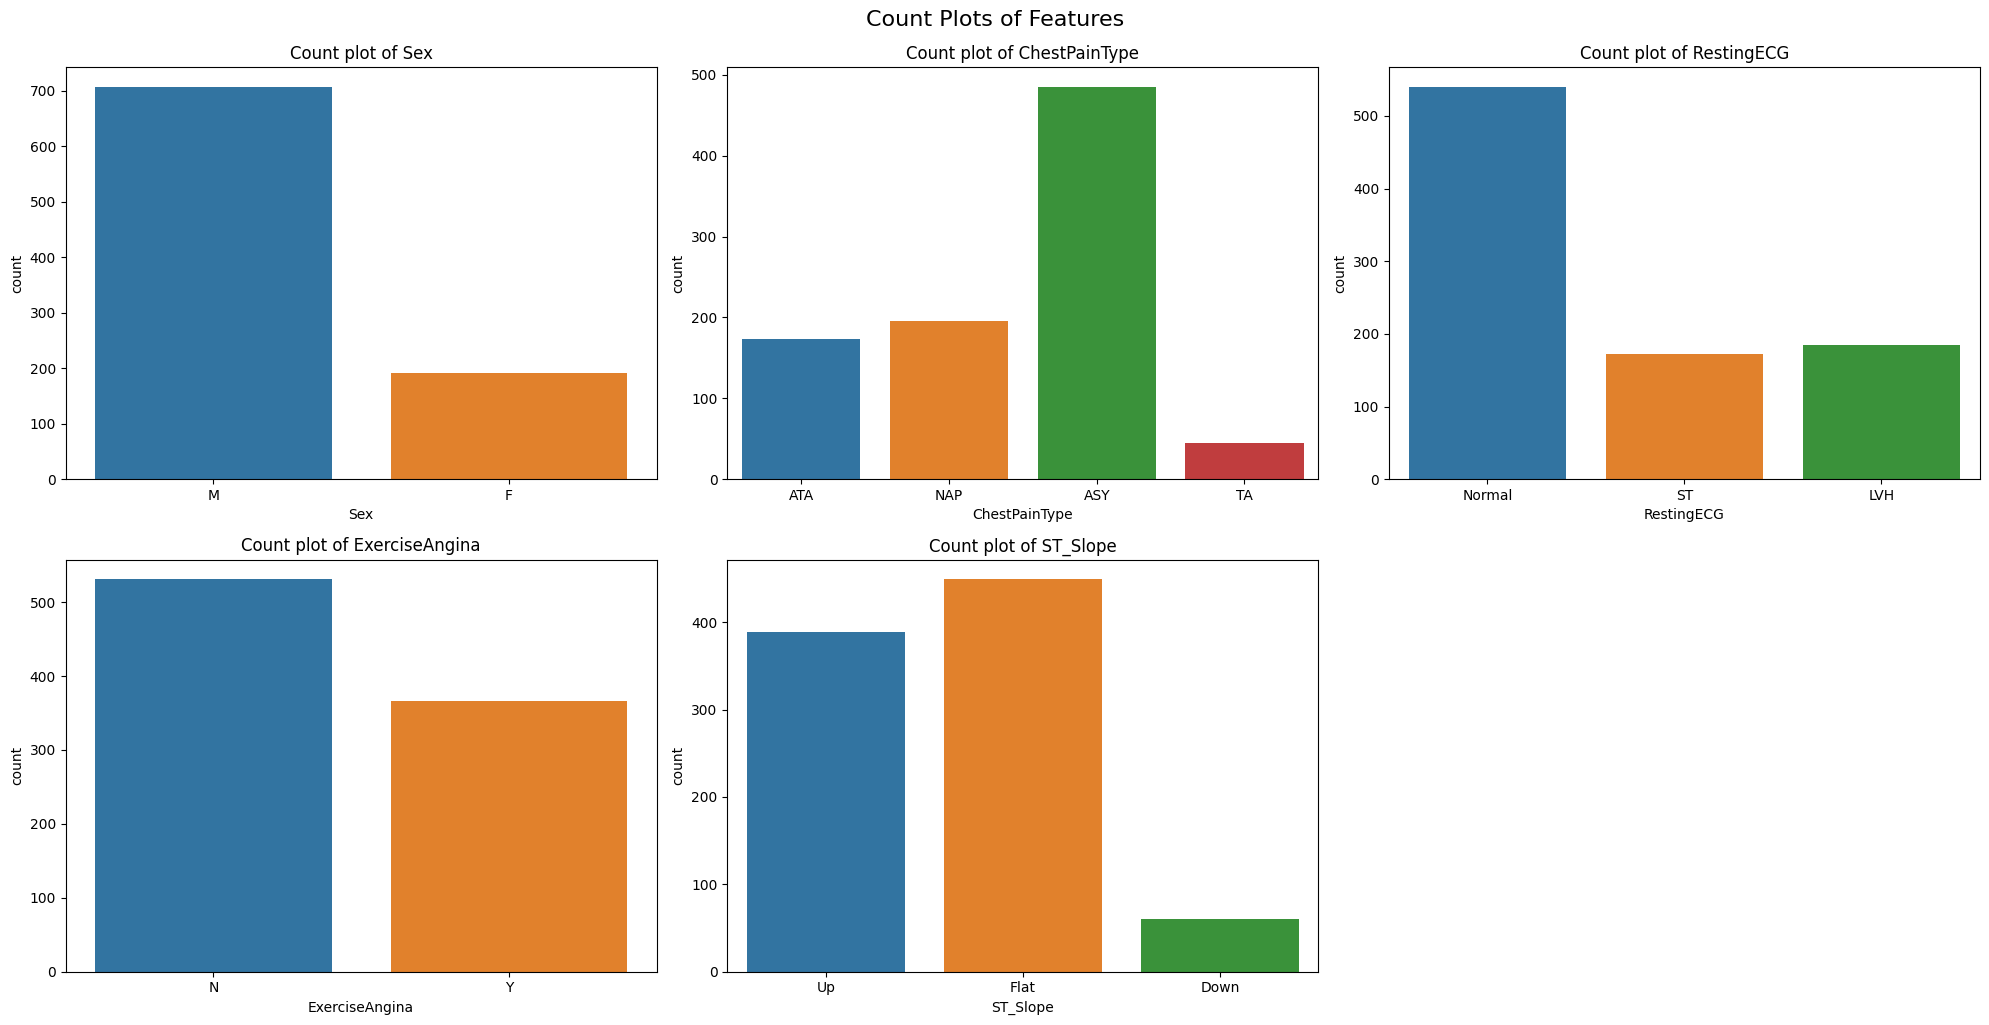

In [27]:
# Calculate the number of rows needed for subplots
n = len(categorical_columns)
rows = int(np.ceil(n/3))

fig, axs = plt.subplots(rows, 3, figsize=(20, 5*rows))

# Flatten the axes array, to make iterating over it easier
axs = axs.flatten()

for i, c in enumerate(categorical_columns):
    sns.countplot(x=df2[c], ax=axs[i])
    axs[i].set_title(f'Count plot of {c}')

# Remove any unused subplots
if n % 3:
    for j in range(n, rows*3):
        fig.delaxes(axs[j])

plt.tight_layout()
plt.suptitle('Count Plots of Features', x=0.5, y=1.02, fontsize=16)
plt.show()

## Bivariant Analysis

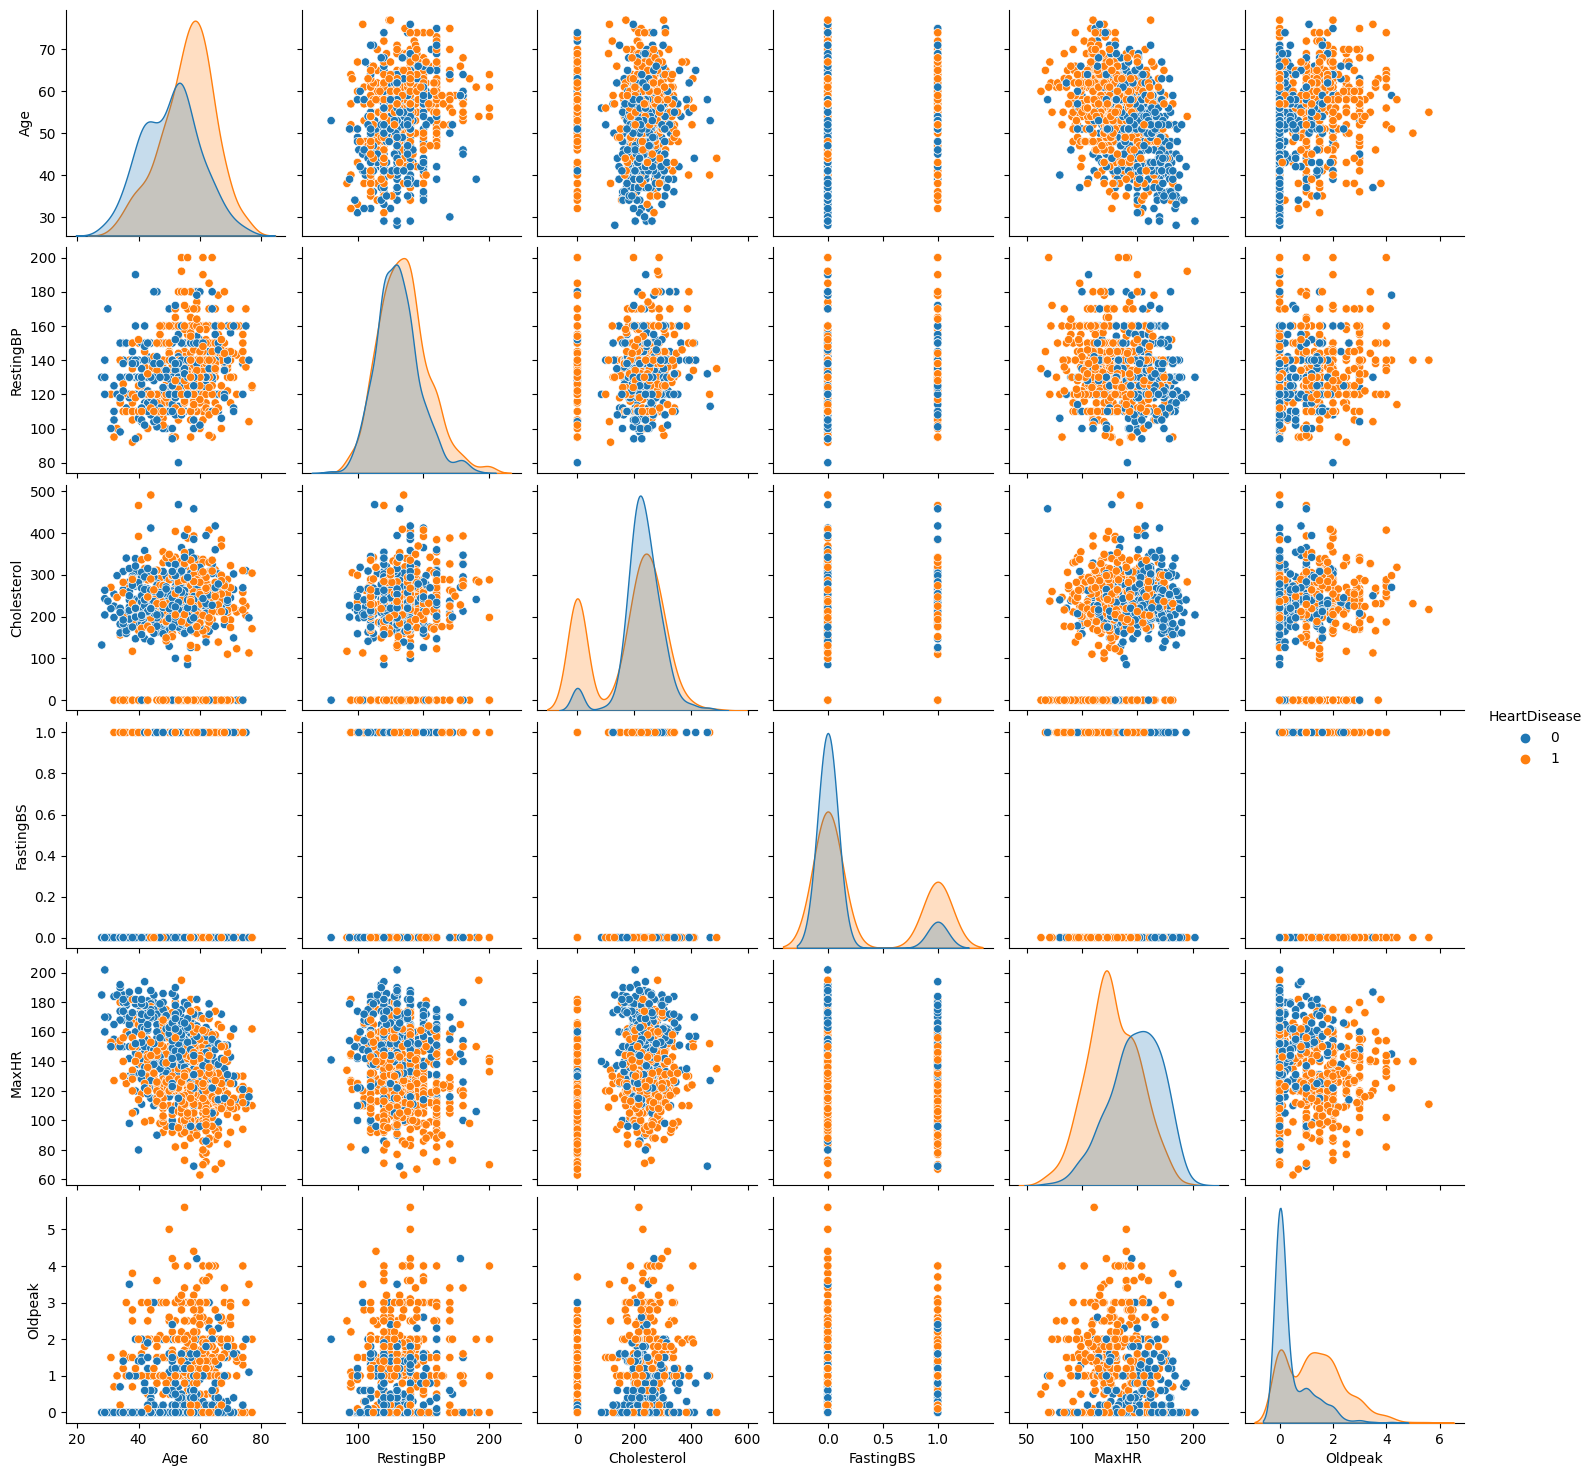

In [28]:
sns.pairplot(df2[numerical_columns], hue='HeartDisease', diag_kind='kde')
plt.show()

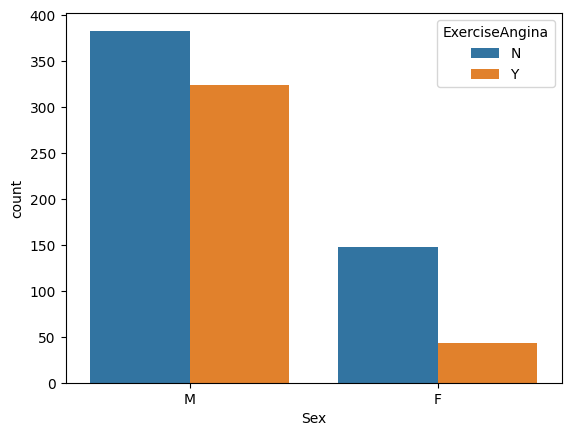

In [29]:
sns.countplot(x=df2['Sex'], hue=df2['ExerciseAngina']);

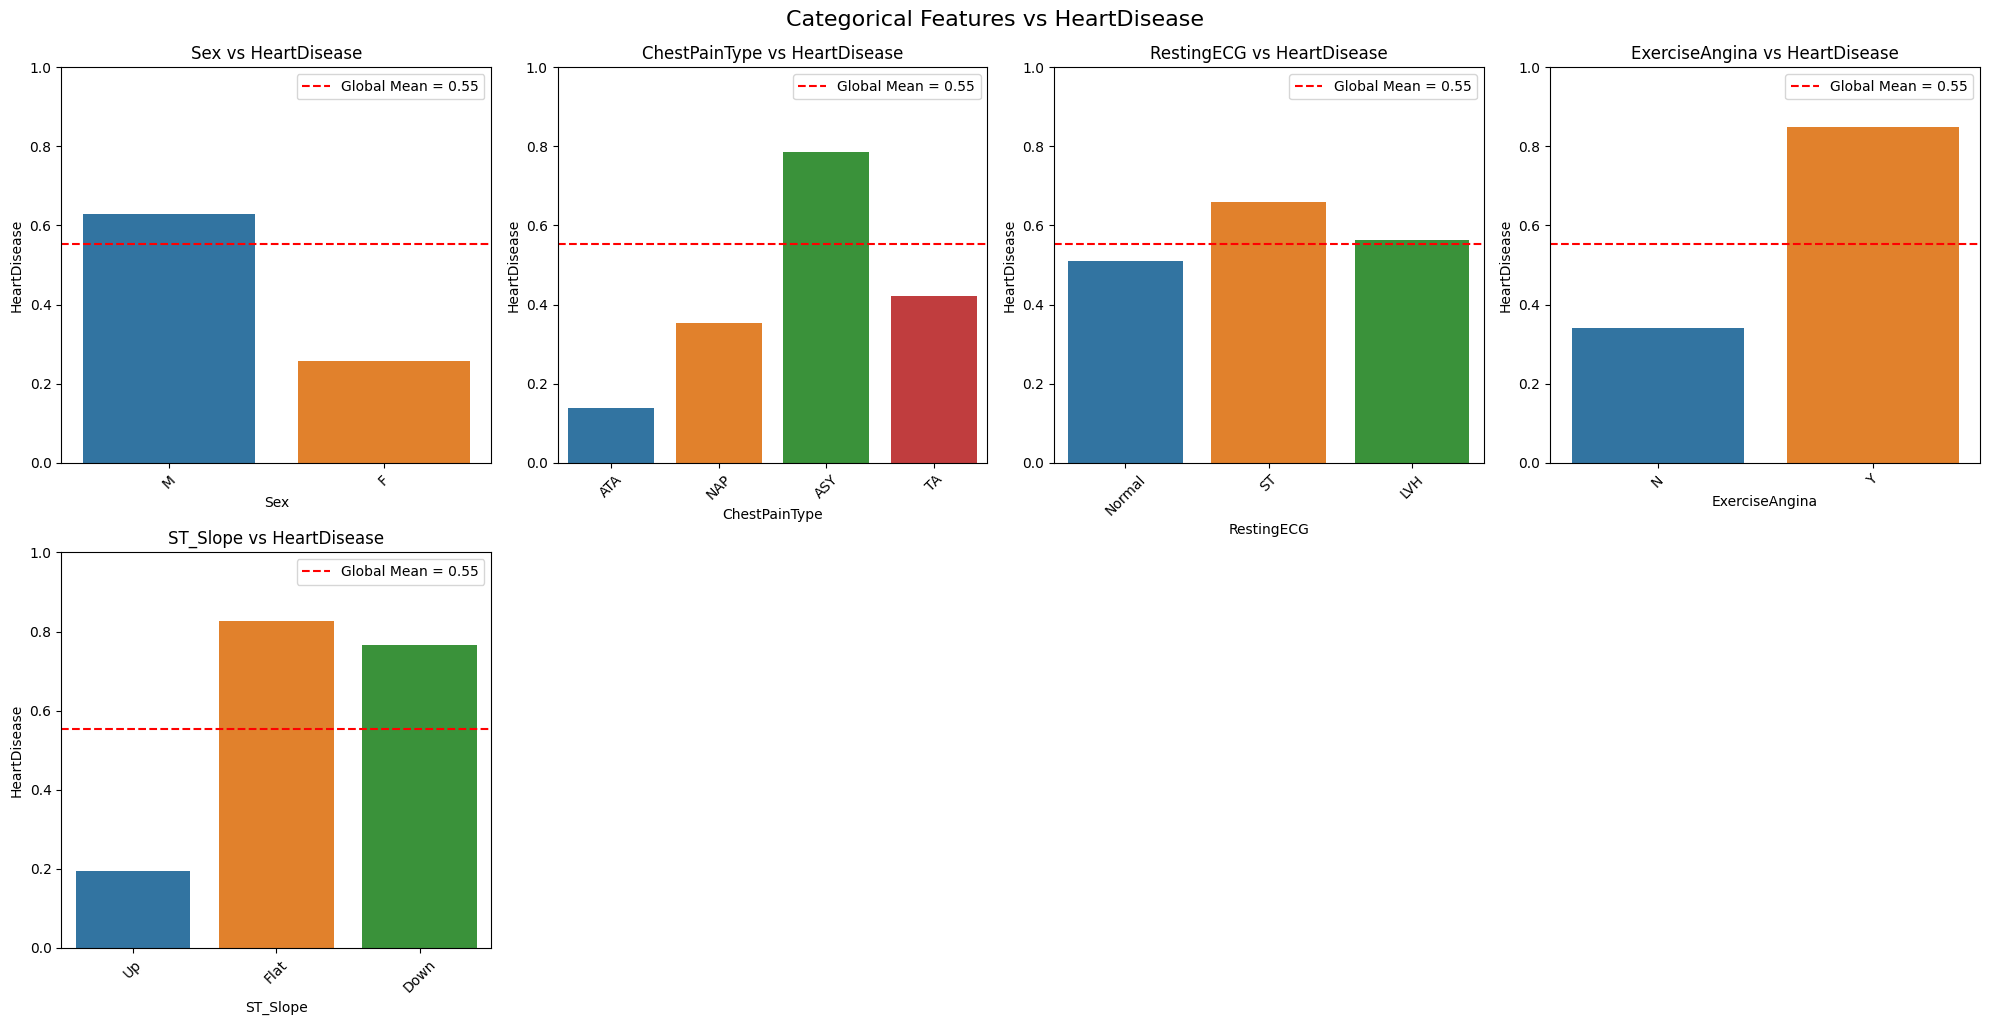

In [30]:
n = len(categorical_columns)
rows = int(np.ceil(n/4))

fig, axs = plt.subplots(rows, 4, figsize=(20, 5*rows))
axs = axs.flatten()

global_mean = df['HeartDisease'].mean()

for i, c in enumerate(categorical_columns):
    # Barplot of mean HeartDisease per category
    sns.barplot(x=df2[c], y=df2['HeartDisease'], ax=axs[i], errorbar=None, estimator=np.mean)
    
    # Plot global mean line
    axs[i].axhline(global_mean, color='red', linestyle='--', label=f'Global Mean = {global_mean:.2f}')
    
    axs[i].set_title(f'{c} vs HeartDisease')
    axs[i].set_ylim(0, 1)  # since HeartDisease is binary
    axs[i].tick_params(axis='x', rotation=45)
    axs[i].legend()

# Remove unused subplots
if n % 4:
    for j in range(n, rows*4):
        fig.delaxes(axs[j])

plt.tight_layout()
plt.suptitle('Categorical Features vs HeartDisease', x=0.5, y=1.02, fontsize=16)
plt.show()

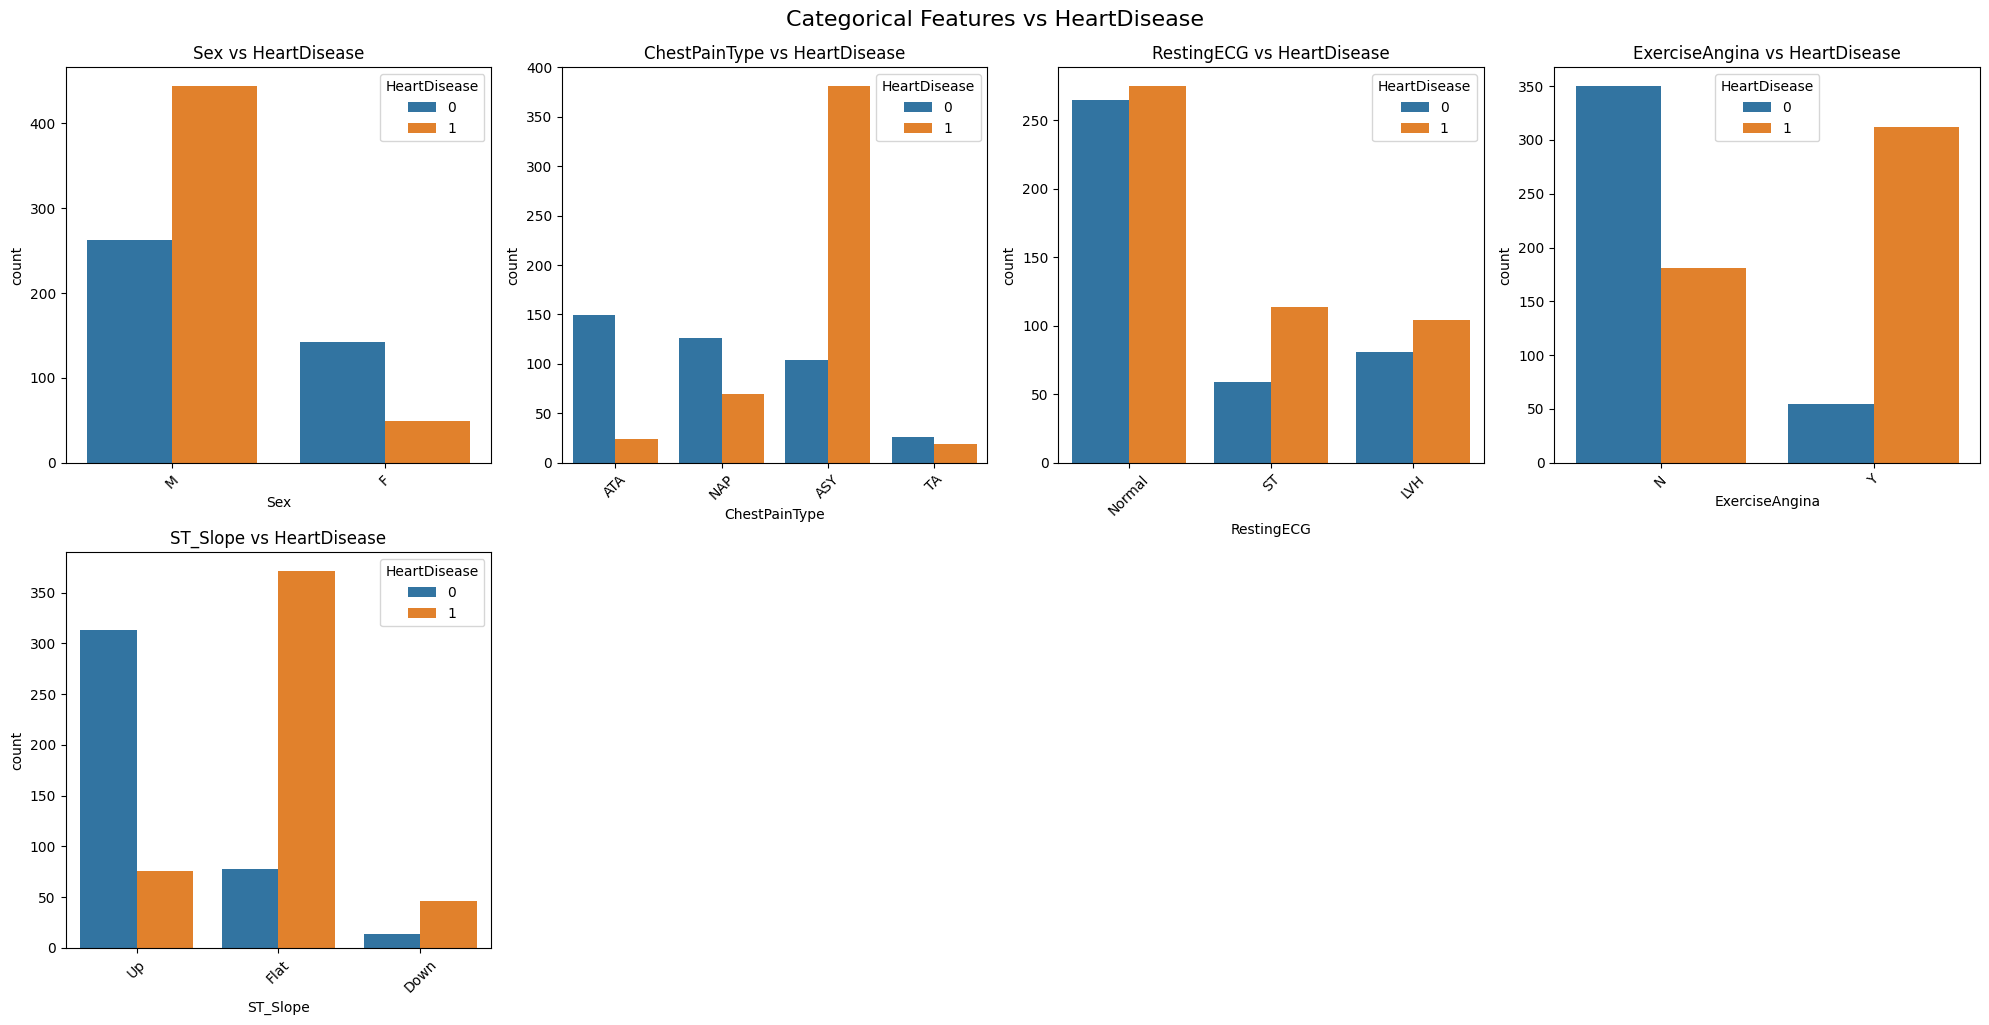

In [31]:
n = len(categorical_columns)
rows = int(np.ceil(n/4))

fig, axs = plt.subplots(rows, 4, figsize=(20, 5*rows))
axs = axs.flatten()

for i, c in enumerate(categorical_columns):
    sns.countplot(x=df2[c], hue=df2['HeartDisease'], ax=axs[i])
    axs[i].set_title(f'{c} vs HeartDisease')
    axs[i].tick_params(axis='x', rotation=45)

# Remove unused subplots
if n % 4:
    for j in range(n, rows*4):
        fig.delaxes(axs[j])

plt.tight_layout()
plt.suptitle('Categorical Features vs HeartDisease', x=0.5, y=1.02, fontsize=16)
plt.show()

# Label Encoding

In [32]:
df2 = pd.get_dummies(df2, drop_first=True)

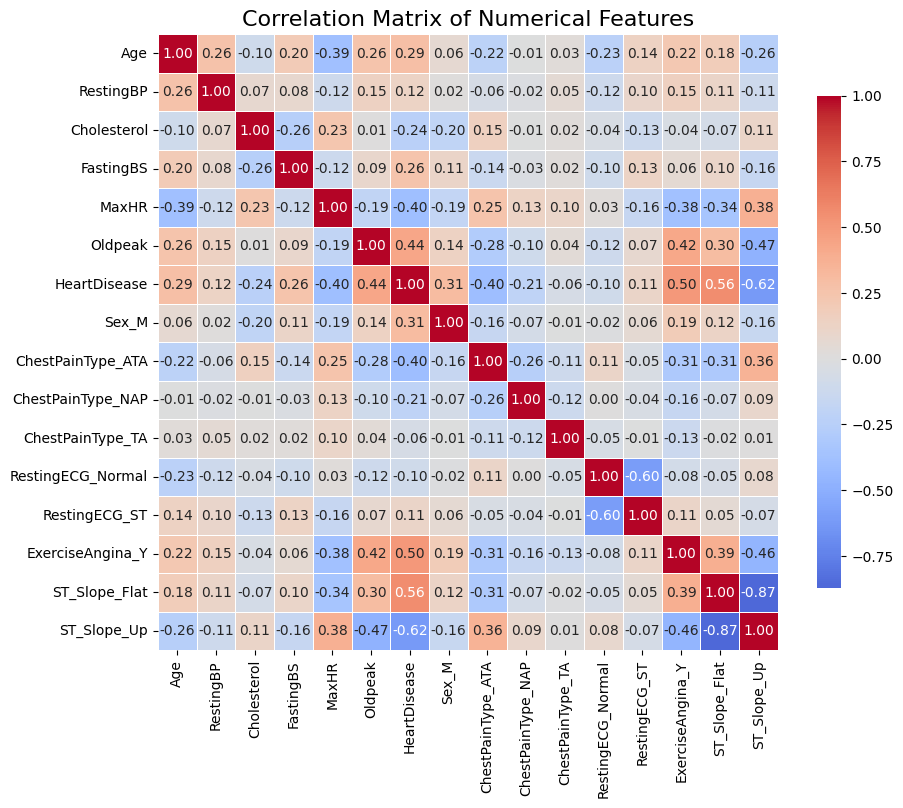

In [33]:
plt.figure(figsize=(10,8))
sns.heatmap(df2.corr(), annot=True, cmap="coolwarm", center=0, fmt=".2f",
            linewidths=0.5, cbar_kws={"shrink": 0.8})
plt.title("Correlation Matrix of Numerical Features", fontsize=16)
plt.show()